# Background

We need to identify a set of events and parameters with the highest or lowest correlation with the potential account cancellation. Prioritize the events, event properties or user properties, which have highest or lowest correlation with the account cancellation


# Wee will conduct several standart studies of our data. Let's see how many missing values and look at the data types 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np

In [15]:
#reading data from file
data = pd.read_csv('Documents/hacaton/int20h-ds-test-dataset.csv')
data.head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1"


In [16]:
data.drop_duplicates()
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              23357 non-null  object
 1   user_state          23286 non-null  object
 2   event_name          23357 non-null  object
 3   event_attributes    23357 non-null  object
 4   event_created_date  23357 non-null  object
 5   event_platform      23357 non-null  object
 6   device_manufacture  15847 non-null  object
 7   device_model        15847 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


None

In [17]:
display(data.describe())

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
count,23357,23286,23357,23357,23357,23357,15847,15847
unique,3540,49,23,2309,20452,3,22,290
top,627f50253b42607513a1c93bb68201ad,CA,Order,"{""Premium Membership"":""True""}",2022-03-16 08:20:51,ios,Apple,"iPhone12,1"
freq,498,8627,6116,5451,17,9586,9586,1489


In [18]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(data.columns):
    variables.loc[i] = [var, data[var].nunique(), data[var].unique().tolist()]
variables.set_index('Variable', inplace=True)    
variables

,Number of unique values,Values
Variable,,
userid,3540,"[c95c777785faec8dd910d019d7278ebe, f344be2d9a0..."
user_state,49,"[CA, FL, IL, TX, nan, VA, DE, WI, NY, CT, WA, ..."
event_name,23,"[Add Vehicle Success, Add Vehicle Break, Calcu..."
event_attributes,2309,"[{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Wh..."
event_created_date,20452,"[2022-01-16 17:03:04, 2022-01-16 17:07:47, 202..."
event_platform,3,"[android, ios, outofband]"
device_manufacture,22,"[samsung, Apple, TCL, nan, motorola, Yulong, W..."
device_model,290,"[SM-N975U, SM-G973U1, iPhone12,1, SM-A716U, SM..."


## Let's add 3 new columns:
#### 'alive' 
-> 1 if user continue using prorgam,
           0 if user stop using prorgam
#### 'subscribed' 
 -> 1 if user made a supscirbition,
               0 if not
#### 'ordered_smth'
-> 1 if user ordered something,
                 0 if not

In [19]:
cancel_rows = data.loc[data.event_name == 'Subscription Premium Cancel']
alive = ~data.userid.isin(cancel_rows.userid.values)
data['alive'] = alive.map(int)
data.to_csv('output.csv')

In [20]:
subscr_rows = data.loc[data.event_name == 'Subscription Premium']
subscribers = data.userid.isin(subscr_rows.userid.values)
data['subscribed'] = subscribers.map(int)
data.to_csv('output.csv')

In [21]:
order_rows = data.loc[data.event_name == 'Order']
buyers = data.userid.isin(order_rows.userid.values)
data['ordered_smth'] = buyers.map(int)
data.to_csv('output.csv')

In [22]:
vihecle_succ_rows = data.loc[data.event_name == 'Order']
buyers = data.userid.isin(order_rows.userid.values)
data['ordered_smth'] = buyers.map(int)
data.to_csv('output.csv')

### Made a new csv file 'output.csv' with new columns

In [24]:
new_data = pd.read_csv('Documents/hacaton/output.csv')
new_data.head()

,Unnamed: 0,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model,alive,subscribed,ordered_smth
0,0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U,1,0,1
1,1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U,1,0,1
2,2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1,1,0,1
3,3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U,1,0,1
4,4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1",1,0,0


## Correlation between our data

#### Calculating amount of users for every event, who after cancel Subscription Premium

In [25]:
amount_events_cancel = {}
for event in new_data['event_name'].unique():
    cancel = new_data[new_data['alive'] == 0]
    df = new_data[new_data['event_name'] == event]
    df_cancel = cancel.merge(df, on='userid', how='inner')
    amount = df_cancel.shape[0]
    amount_events_cancel[event] = amount
print(amount_events_cancel)

{'Add Vehicle Success': 4962, 'Add Vehicle Break': 1736, 'Calculator View': 5140, 'Add Payment Method Success': 5513, 'Sign Up Success': 4440, 'Add Payment Method Failed': 1192, 'Wallet Opened': 18620, 'Transaction Refund': 1797, 'Email Confirmation Success': 1619, 'Account Setup Skip': 226, 'Subscription Premium': 4466, 'Chat Conversation Opened': 22360, 'Account Setup Profile Skip': 1241, 'Account History Transaction Details': 25039, 'Sign Out': 28967, 'Chat Conversation Started': 23577, 'Order': 41953, 'Sign Up Error': 30, 'Subscription Premium Cancel': 5765, 'Calculator Used': 774, 'Subscription Premium Renew': 1090, 'Add Vehicle Failed': 7, 'Reset Password Set': 0}


In [40]:
#creating 2 lists:
# 1- names of events
# 2- amount of users who did this event and than cancel subscribtion

keys_cancel = list(amount_events_cancel.keys())
print(keys_cancel)
values_cancel = list(amount_events_cancel.values())
print(values_cancel)

['Add Vehicle Success', 'Add Vehicle Break', 'Calculator View', 'Add Payment Method Success', 'Sign Up Success', 'Add Payment Method Failed', 'Wallet Opened', 'Transaction Refund', 'Email Confirmation Success', 'Account Setup Skip', 'Subscription Premium', 'Chat Conversation Opened', 'Account Setup Profile Skip', 'Account History Transaction Details', 'Sign Out', 'Chat Conversation Started', 'Order', 'Sign Up Error', 'Subscription Premium Cancel', 'Calculator Used', 'Subscription Premium Renew', 'Add Vehicle Failed', 'Reset Password Set']
[4962, 1736, 5140, 5513, 4440, 1192, 18620, 1797, 1619, 226, 4466, 22360, 1241, 25039, 28967, 23577, 41953, 30, 5765, 774, 1090, 7, 0]


#### Calculating amount of users for every event, who do not cancel Subscription Premium

In [45]:
amount_events = {}
for event in new_data['event_name'].unique():
    cancel = new_data[new_data['alive'] == 1]
    df = new_data[new_data['event_name'] == event]
    df_cancel = cancel.merge(df, on='userid', how='inner')
    amount = df_cancel.shape[0]
    amount_events[event] = amount
print(amount_events)

{'Add Vehicle Success': 16097, 'Add Vehicle Break': 3564, 'Calculator View': 9959, 'Add Payment Method Success': 13657, 'Sign Up Success': 15705, 'Add Payment Method Failed': 2873, 'Wallet Opened': 56694, 'Transaction Refund': 110, 'Email Confirmation Success': 5652, 'Account Setup Skip': 1016, 'Subscription Premium': 8403, 'Chat Conversation Opened': 23144, 'Account Setup Profile Skip': 3445, 'Account History Transaction Details': 53577, 'Sign Out': 4221, 'Chat Conversation Started': 14545, 'Order': 713675, 'Sign Up Error': 115, 'Subscription Premium Cancel': 0, 'Calculator Used': 2778, 'Subscription Premium Renew': 5741, 'Add Vehicle Failed': 154, 'Reset Password Set': 8}


In [51]:
# creating list of amount of users who didn't cancel subscribtion

values_without_cancel = list(amount_events.values())
print(values_without_cancel)

[16097, 3564, 9959, 13657, 15705, 2873, 56694, 110, 5652, 1016, 8403, 23144, 3445, 53577, 4221, 14545, 713675, 115, 0, 2778, 5741, 154, 8]


In [85]:
#converting list of amount of users who did this event and than cancel subscribtion and 
# list of amount of users who didn't cancel subscribtion to numpy arrays

cancel_np = np.array(values_cancel)
without_cancel_np = np.array(values_without_cancel)

all_users = cancel_np + without_cancel_np

# % of users who cancel subscribtion for each event 

corr_np = cancel_np / all_users
corr_np = corr_np.tolist()

for i in range(len(keys_cancel)):
    print(keys_cancel[i], 'correlation = ', corr_np[i])

Add Vehicle Success correlation =  0.23562372382354338
Add Vehicle Break correlation =  0.32754716981132076
Calculator View correlation =  0.34041989535730843
Add Payment Method Success correlation =  0.287584767866458
Sign Up Success correlation =  0.22040208488458674
Add Payment Method Failed correlation =  0.2932349323493235
Wallet Opened correlation =  0.24723159040815784
Transaction Refund correlation =  0.9423177766124803
Email Confirmation Success correlation =  0.22266538302846925
Account Setup Skip correlation =  0.1819645732689211
Subscription Premium correlation =  0.34703551169477037
Chat Conversation Opened correlation =  0.4913853727144866
Account Setup Profile Skip correlation =  0.26483141271873667
Account History Transaction Details correlation =  0.31849750686883077
Sign Out correlation =  0.8728154754730626
Chat Conversation Started correlation =  0.6184617805991292
Order correlation =  0.0555207059558407
Sign Up Error correlation =  0.20689655172413793
Subscription 

## Now we need to see some statistics about users properties (users, who cancel subscribtion)

In [108]:
cancel = new_data[new_data['alive'] == 0]
cancel.head()

,Unnamed: 0,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model,alive,subscribed,ordered_smth
94,94,4949c7b6dfa8cef23d641fd98d50ab18,TX,Order,"{""Premium Membership"":""True""}",2022-01-17 06:42:11,outofband,NaN,NaN,0,0,1
109,109,ddfd6a4298e15df738efd4daa76403e4,NY,Chat Conversation Opened,"{""From"":""Menu"",""Transaction type"":""""}",2022-01-17 13:42:19,android,samsung,SM-A022M,0,0,1
110,110,ddfd6a4298e15df738efd4daa76403e4,NY,Chat Conversation Started,{},2022-01-17 13:42:19,android,samsung,SM-A022M,0,0,1
111,111,ddfd6a4298e15df738efd4daa76403e4,NY,Chat Conversation Opened,"{""From"":""Menu"",""Transaction type"":""""}",2022-01-17 13:49:46,android,samsung,SM-A022M,0,0,1
112,112,ddfd6a4298e15df738efd4daa76403e4,NY,Chat Conversation Started,{},2022-01-17 13:49:46,android,samsung,SM-A022M,0,0,1


/var/folders/nr/qwr9pttn70x8bjvf2fnkl46h0000gn/T/ipykernel_51697/4026966114.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(types, rotation = 90)


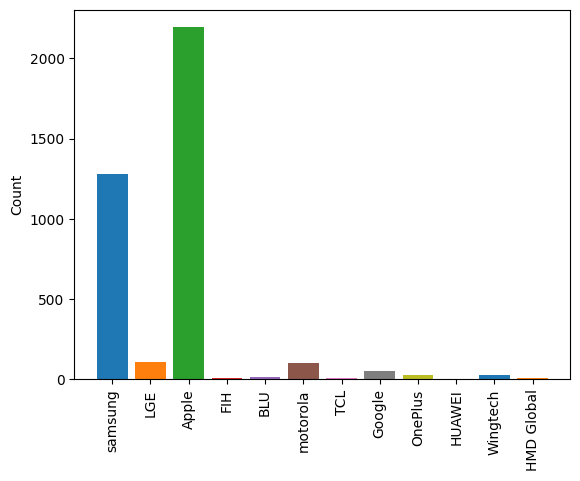

In [107]:
#deleting rows with Nan values
cancel = cancel.dropna()

#creating statistic plot
fig, ax = plt.subplots()
types = cancel['device_manufacture'].unique()

for type_ in types:
    types_df = cancel[cancel['device_manufacture'] == type_]
    ax.bar(type_, types_df['device_manufacture'].value_counts())
ax.set_ylabel('Count')
ax.set_xticklabels(types, rotation = 90)
plt.show()

/var/folders/nr/qwr9pttn70x8bjvf2fnkl46h0000gn/T/ipykernel_51697/2301381484.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(types, rotation = 90)


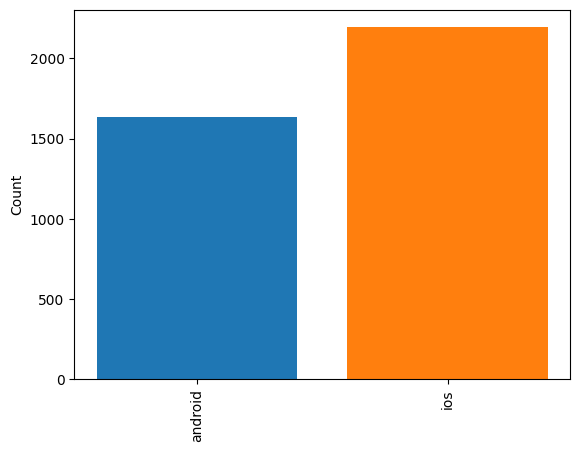

In [109]:
#deleting rows with Nan values
cancel = cancel.dropna()

#creating statistic plot
fig, ax = plt.subplots()
types = cancel['event_platform'].unique()

for type_ in types:
    types_df = cancel[cancel['event_platform'] == type_]
    ax.bar(type_, types_df['event_platform'].value_counts())
ax.set_ylabel('Count')
ax.set_xticklabels(types, rotation = 90)
plt.show()

# Conclusion 
### Events that made he most impact on canceling premium subscribtion : Transaction Refund (0.9), Sign Out(0.8), Chat Conversation Started (0.4)
### Most of these users using Apple and Sumsung devices and IOS and Android platforms